In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [20]:
# Load summarized data
summary_path = '../data/flughafen_netzwerk_zusammenfassung.csv'
summary_df = pd.read_csv(summary_path)


In [21]:

# Create the graph
graph = nx.DiGraph()

# Add nodes from summary data
for index, row in summary_df.iterrows():
    graph.add_node(
        row['source_airport'],
        name=row['source_name'],
        city=row['source_city'],
        country=row['source_country'],
        latitude=row['source_lat'],
        longitude=row['source_lon']
    )
    graph.add_node(
        row['destination_airport'],
        name=row['dest_name'],
        city=row['dest_city'],
        country=row['dest_country'],
        latitude=row['dest_lat'],
        longitude=row['dest_lon']
    )

# Add edges from summary data
for index, row in summary_df.iterrows():
    graph.add_edge(
        row['source_airport'],
        row['destination_airport'],
        airline=row['airline'],
        stops=row['stops']
    )

# Analyze the network
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

# Filter the network (e.g., remove nodes with low degree centrality)
centrality_threshold = 0.01
degree_centrality = nx.degree_centrality(graph)
filtered_nodes = [node for node, centrality in degree_centrality.items() if centrality >= centrality_threshold]
filtered_graph = graph.subgraph(filtered_nodes)

# Social Network Analysis
print("\n--- Social Network Analysis ---\n")

# 1. Degree Centrality
print("Top 10 Nodes by Degree Centrality:")
degree_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in degree_sorted:
    print(f"{node}: {centrality:.4f}")

# 2. Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(filtered_graph)
print("\nTop 10 Nodes by Betweenness Centrality:")
betweenness_sorted = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in betweenness_sorted:
    print(f"{node}: {centrality:.4f}")

# 3. Closeness Centrality
closeness_centrality = nx.closeness_centrality(filtered_graph)
print("\nTop 10 Nodes by Closeness Centrality:")
closeness_sorted = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in closeness_sorted:
    print(f"{node}: {centrality:.4f}")

# 4. Eigenvector Centrality
try:
    eigenvector_centrality = nx.eigenvector_centrality(filtered_graph)
    print("\nTop 10 Nodes by Eigenvector Centrality:")
    eigenvector_sorted = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for node, centrality in eigenvector_sorted:
        print(f"{node}: {centrality:.4f}")
except nx.PowerIterationFailedConvergence:
    print("\nEigenvector Centrality could not be calculated (convergence issues).")

# Community Detection
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(filtered_graph))
print("\nNumber of communities:", len(communities))
for i, community in enumerate(communities):
    print(f"Community {i+1} (size {len(community)}):", list(community))


Number of nodes: 3425
Number of edges: 37594

--- Social Network Analysis ---

Top 10 Nodes by Degree Centrality:
FRA: 0.1393
CDG: 0.1373
AMS: 0.1352
IST: 0.1335
ATL: 0.1265
PEK: 0.1203
ORD: 0.1195
MUC: 0.1110
DME: 0.1104
DFW: 0.1086

Top 10 Nodes by Betweenness Centrality:
FRA: 0.0727
AMS: 0.0640
CDG: 0.0637
PEK: 0.0541
LHR: 0.0378
DXB: 0.0360
JFK: 0.0340
HKG: 0.0338
IST: 0.0320
PVG: 0.0279

Top 10 Nodes by Closeness Centrality:
FRA: 0.6270
AMS: 0.6163
CDG: 0.6141
LHR: 0.5897
MUC: 0.5863
IST: 0.5823
FCO: 0.5776
JFK: 0.5711
DXB: 0.5711
ZRH: 0.5647

Top 10 Nodes by Eigenvector Centrality:
AMS: 0.1689
FRA: 0.1685
CDG: 0.1617
MUC: 0.1512
LHR: 0.1406
FCO: 0.1405
BCN: 0.1324
ZRH: 0.1306
IST: 0.1286
BRU: 0.1259

Number of communities: 3
Community 1 (size 191): ['CCU', 'SVO', 'KHI', 'TNA', 'LAD', 'DAR', 'MRU', 'CGK', 'YNT', 'CKG', 'BLR', 'ICN', 'TNR', 'XIY', 'HYD', 'PPT', 'LOS', 'SHJ', 'CTS', 'KHV', 'DWC', 'ITM', 'SHE', 'BKK', 'COK', 'DMK', 'VLI', 'NGB', 'KHH', 'ALA', 'AUH', 'NKG', 'CGQ', 'HA

Number of nodes: 3425
Number of edges: 37594


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

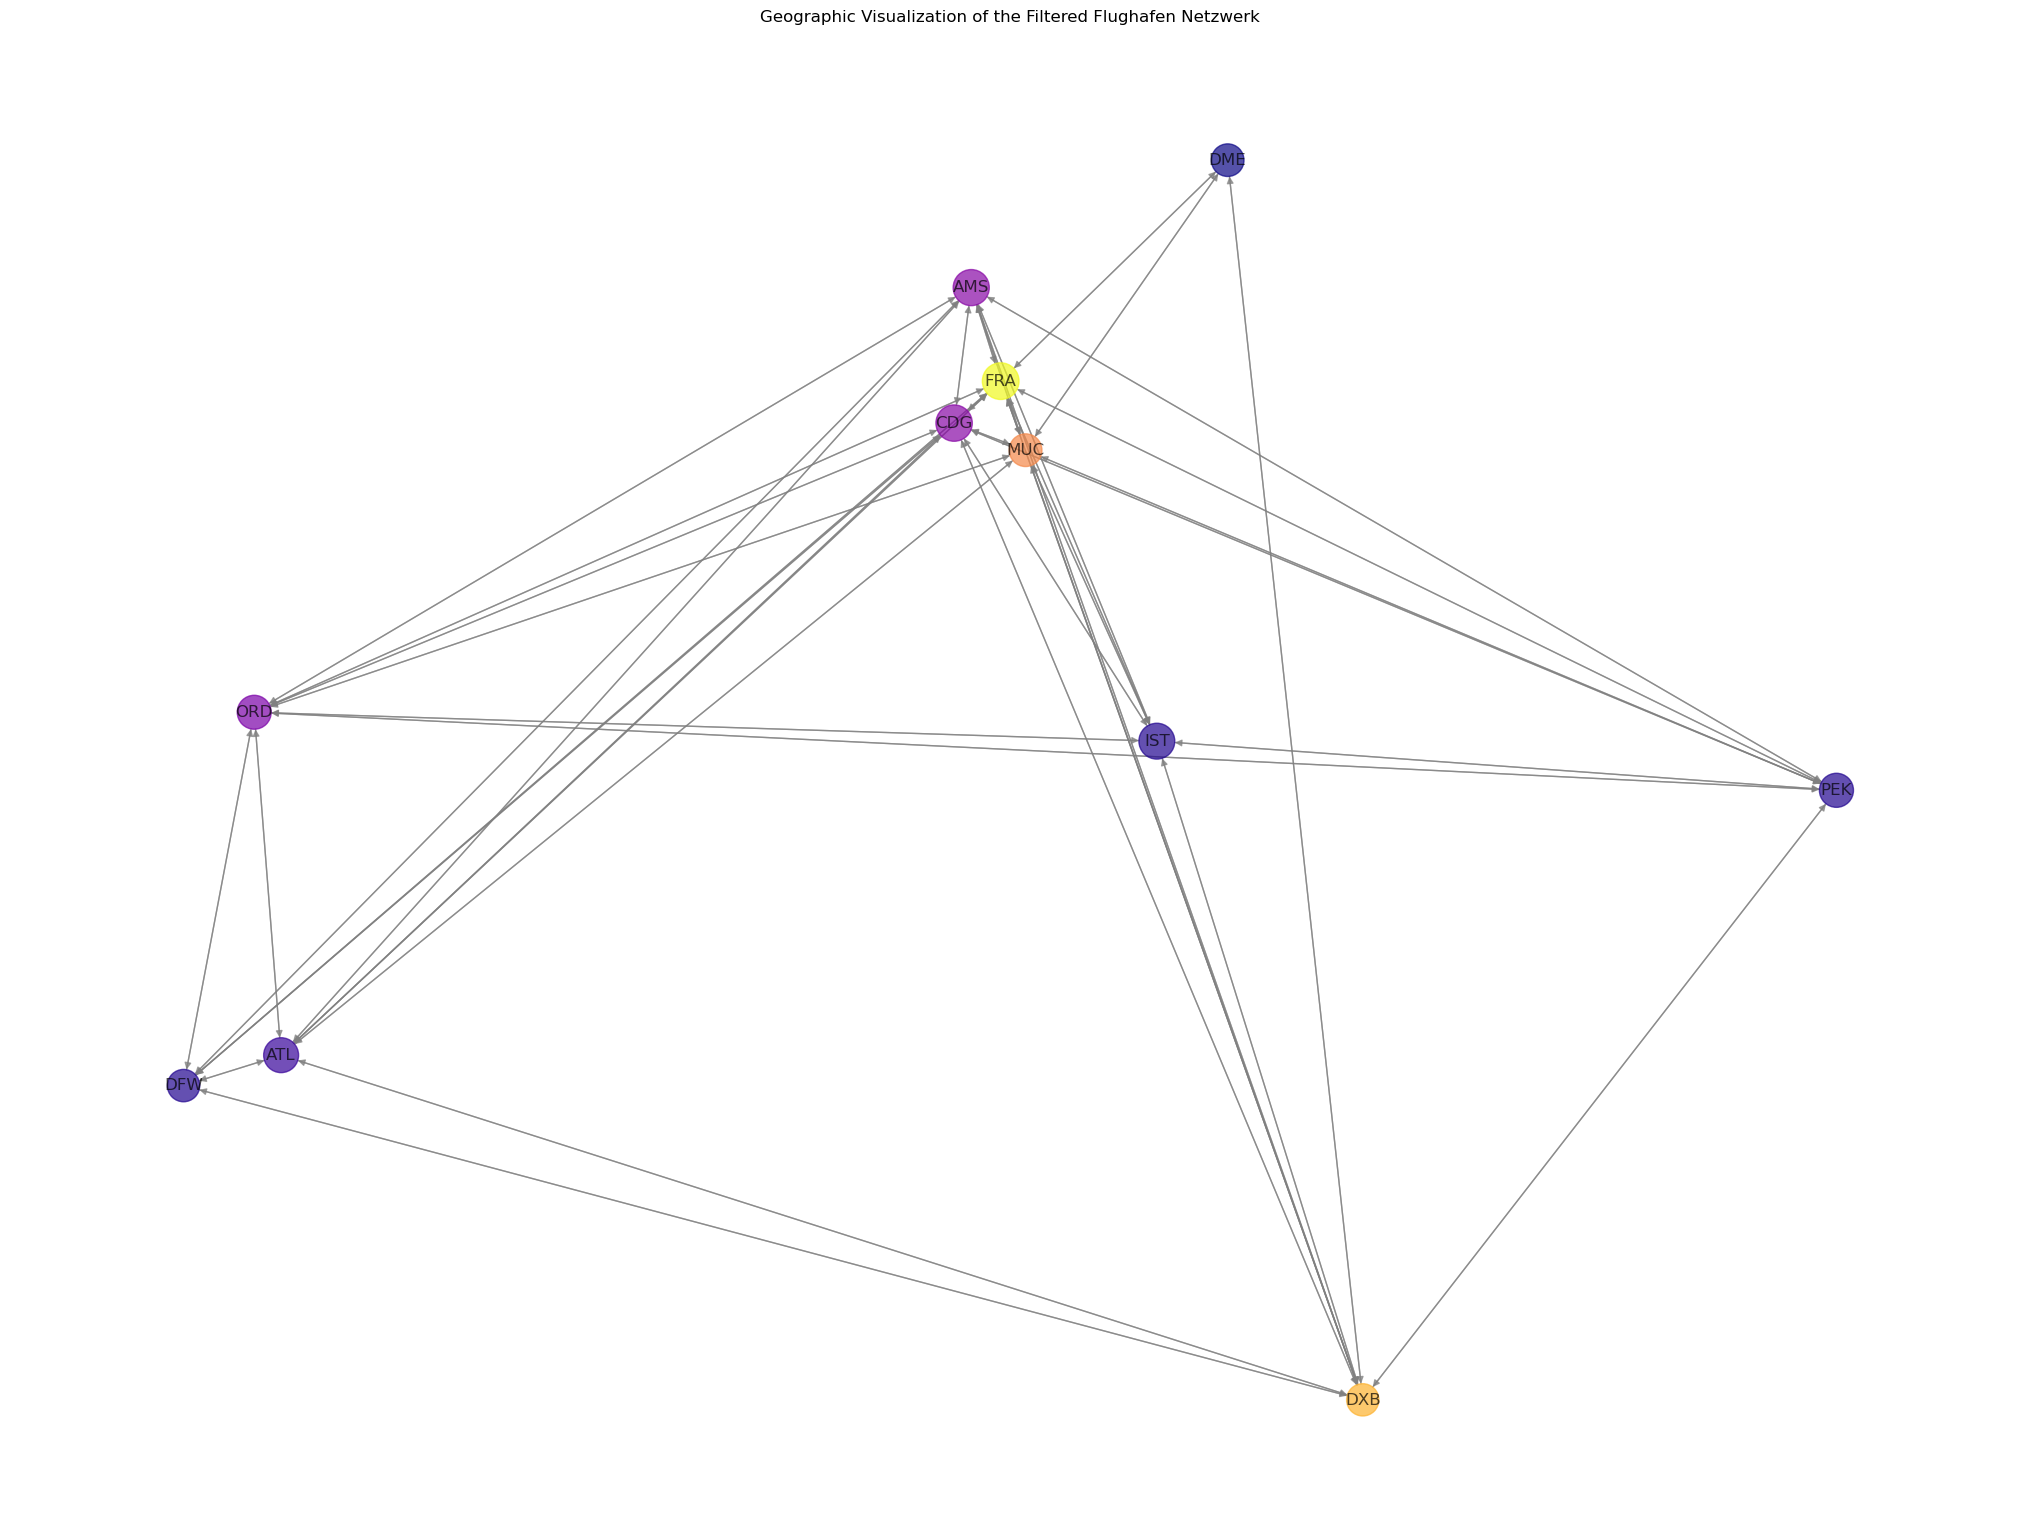

In [22]:


# Create the graph
graph = nx.DiGraph()

# Add nodes from summary data
for index, row in summary_df.iterrows():
    graph.add_node(
        row['source_airport'],
        name=row['source_name'],
        city=row['source_city'],
        country=row['source_country'],
        latitude=row['source_lat'],
        longitude=row['source_lon']
    )
    graph.add_node(
        row['destination_airport'],
        name=row['dest_name'],
        city=row['dest_city'],
        country=row['dest_country'],
        latitude=row['dest_lat'],
        longitude=row['dest_lon']
    )

# Add edges from summary data
for index, row in summary_df.iterrows():
    graph.add_edge(
        row['source_airport'],
        row['destination_airport'],
        airline=row['airline'],
        stops=row['stops']
    )

# Analyze the network
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

# Filter the network (e.g., remove nodes with low degree centrality)
centrality_threshold = 0.01
degree_centrality = nx.degree_centrality(graph)
filtered_nodes = [node for node, centrality in degree_centrality.items() if centrality >= centrality_threshold]
filtered_graph = graph.subgraph(filtered_nodes)

# Create geographic layout for visualization
geo_pos = {
    node: (data['longitude'], data['latitude'])
    for node, data in filtered_graph.nodes(data=True)
    if 'latitude' in data and 'longitude' in data
}

# Draw the graph
plt.figure(figsize=(20, 15))
nx.draw(
    filtered_graph,
    pos=geo_pos,
    with_labels=True,
    node_size=[5000 * degree_centrality[node] for node in filtered_graph.nodes()],
    node_color=list(nx.betweenness_centrality(filtered_graph).values()),
    cmap=plt.cm.plasma,
    edge_color='gray',
    alpha=0.7
)
plt.title("Geographic Visualization of the Filtered Flughafen Netzwerk")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label="Betweenness Centrality")
plt.show()

# Community Detection
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(filtered_graph))
print("Number of communities:", len(communities))
for i, community in enumerate(communities):
    print(f"Community {i+1} (size {len(community)}):", community)

In [24]:
# Interactive Visualization
# Create geographic layout for visualization
geo_pos = {
    node: (data['longitude'], data['latitude'])
    for node, data in filtered_graph.nodes(data=True)
    if 'latitude' in data and 'longitude' in data
}

# Prepare data for interactive visualization
edge_x = []
edge_y = []
for edge in filtered_graph.edges():
    x0, y0 = geo_pos[edge[0]]
    x1, y1 = geo_pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scattergeo(
    lon=edge_x,
    lat=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_x = []
node_y = []
node_size = []
node_color = []
node_text = []
for node in filtered_graph.nodes(data=True):
    x, y = geo_pos[node[0]]
    node_x.append(x)
    node_y.append(y)
    node_size.append(10 + degree_centrality[node[0]] * 50)
    node_color.append(betweenness_centrality[node[0]])
    node_text.append(f"{node[1]['name']} ({node[1]['city']}, {node[1]['country']})")

node_trace = go.Scattergeo(
    lon=node_x,
    lat=node_y,
    mode='markers',
    marker=dict(
        size=node_size,
        color=node_color,
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title='Betweenness Centrality')
    ),
    text=node_text,
    hoverinfo='text'
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Interactive Geographic Visualization of the Filtered Flughafen Netzwerk",
                    height=800,
                    showlegend=False,
                    geo=dict(
                        scope='world',
                        showland=True,
                        landcolor='rgb(243, 243, 243)',
                        showcountries=True,
                    )
                ))

fig.show()


In [28]:
# Create the graph
graph = nx.DiGraph()

# Add nodes from summary data
for index, row in summary_df.iterrows():
    graph.add_node(
        row['source_airport'],
        name=row['source_name'],
        city=row['source_city'],
        country=row['source_country'],
        latitude=row['source_lat'],
        longitude=row['source_lon']
    )
    graph.add_node(
        row['destination_airport'],
        name=row['dest_name'],
        city=row['dest_city'],
        country=row['dest_country'],
        latitude=row['dest_lat'],
        longitude=row['dest_lon']
    )

# Add edges from summary data
for index, row in summary_df.iterrows():
    graph.add_edge(
        row['source_airport'],
        row['destination_airport'],
        airline=row['airline'],
        stops=row['stops']
    )

# Analyze the network
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

# Filter the network (e.g., remove nodes with low degree centrality)
centrality_threshold = 0.01
degree_centrality = nx.degree_centrality(graph)
filtered_nodes = [node for node, centrality in degree_centrality.items() if centrality >= centrality_threshold]
filtered_graph = graph.subgraph(filtered_nodes)

# Community Detection
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(filtered_graph))
print("\nNumber of communities:", len(communities))
for i, community in enumerate(communities):
    print(f"Community {i+1} (size {len(community)}):", list(community))

# Assign community to nodes
community_mapping = {}
for i, community in enumerate(communities):
    for node in community:
        community_mapping[node] = i

nx.set_node_attributes(filtered_graph, community_mapping, 'community')

# Interactive Visualization with Communities
# Create geographic layout for visualization
geo_pos = {
    node: (data['longitude'], data['latitude'])
    for node, data in filtered_graph.nodes(data=True)
    if 'latitude' in data and 'longitude' in data
}

# Prepare data for interactive visualization
edge_x = []
edge_y = []
for edge in filtered_graph.edges():
    x0, y0 = geo_pos[edge[0]]
    x1, y1 = geo_pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scattergeo(
    lon=edge_x,
    lat=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_x = []
node_y = []
node_size = []
node_color = []
node_text = []
for node in filtered_graph.nodes(data=True):
    x, y = geo_pos[node[0]]
    node_x.append(x)
    node_y.append(y)
    node_size.append(10 + degree_centrality[node[0]] * 50)
    node_color.append(node[1]['community'])
    node_text.append(f"{node[1]['name']} ({node[1]['city']}, {node[1]['country']}) - Community {node[1]['community']} ")

node_trace = go.Scattergeo(
    lon=node_x,
    lat=node_y,
    mode='markers',
    marker=dict(
        size=node_size,
        color=node_color,
        colorscale='Rainbow',
        showscale=True,
        colorbar=dict(title='Community')
    ),
    text=node_text,
    hoverinfo='text'
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Interactive Geographic Visualization of the Communities in Flughafen Netzwerk",
                    height=800,
                    showlegend=False,
                    geo=dict(
                        scope='world',
                        showland=True,
                        landcolor='rgb(243, 243, 243)',
                        showcountries=True,
                    )
                ))

fig.show()


Number of nodes: 3425
Number of edges: 37594

Number of communities: 3
Community 1 (size 191): ['CCU', 'SVO', 'KHI', 'TNA', 'LAD', 'DAR', 'MRU', 'CGK', 'YNT', 'CKG', 'BLR', 'ICN', 'TNR', 'XIY', 'HYD', 'PPT', 'LOS', 'SHJ', 'CTS', 'KHV', 'DWC', 'ITM', 'SHE', 'BKK', 'COK', 'DMK', 'VLI', 'NGB', 'KHH', 'ALA', 'AUH', 'NKG', 'CGQ', 'HAN', 'INC', 'MLE', 'KJA', 'FIH', 'EVN', 'YCU', 'WLG', 'AMD', 'IKA', 'DPS', 'NAY', 'CMB', 'WUH', 'RMQ', 'WUX', 'CSX', 'UPG', 'ACC', 'DAC', 'CEB', 'REP', 'SVX', 'ADD', 'SYX', 'SGN', 'TPE', 'LED', 'MHD', 'GYD', 'MED', 'DYU', 'SUB', 'HRB', 'CNX', 'DLA', 'KTM', 'LBD', 'NAN', 'NGO', 'ROV', 'HET', 'TIP', 'CAI', 'SYD', 'ZUH', 'MYY', 'SZX', 'WNZ', 'KWL', 'KUF', 'CGO', 'AKL', 'DSN', 'HNL', 'DMM', 'BNE', 'DEL', 'THR', 'ABJ', 'CHC', 'OKA', 'KBP', 'BAH', 'LHR', 'SWA', 'FUK', 'DKR', 'FRU', 'TYN', 'MSQ', 'TJM', 'JED', 'HFE', 'NNG', 'DAD', 'MEL', 'JNB', 'MNL', 'SYZ', 'RGN', 'SIN', 'TBS', 'DLC', 'DRW', 'EBB', 'OVB', 'CNS', 'XNN', 'HIR', 'CPT', 'TXN', 'DXB', 'KWE', 'XMN', 'UFA', '